<a href="https://colab.research.google.com/github/sebastiangs26/Coursera_Capstone/blob/main/IBM_Capstone_Final_Week2_Vecindarios_Toronto_NewYork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Capstone: Análisis de los vecindarios de Toronto y Nueva York

## Ciencia de Datos Aplicada - Curso Capstone

###IBM/Coursera (Agosto, 2022)

####Integrante: Sebastián Grimberg Saralegui.

##Tabla de contenidos:

* [Introducción](#Introducción)
* [Datos](#Datos)
* [Metodología](#Metodología)
* [Resultados](#Resultados)
* [Análisis](#Análisis)
* [Conclusiones](#Conclusiones)

## Introducción<a name="Introducción"></a>

###Acerca del informe

En este proyecto se propone realizar tanto un análisis descriptivo como así mismo una comparación de los distintos vecindarios de las ciudades capitales de Canadá y de Estados Unidos: Toronto y Nueva York. Primero vamos a observar como están compuestas estas ciudades y luego nos adentramos en el análisis y se buscarán similitudes y diferencias entre los diferentes vecindarios tomando en cuenta los lugares más comunes de  estos y sus categorías correspondientes.
El informe se encuentra dirigido a una agencia de viajes interesada en recabar información acerca de estos dos grandiosos destinos como parte de un estudio de mercado. 

###Acerca de su importancia

La importancia de este análisis radica en poder conocer más en profundidad acerca de estas dos grandes ciudades, conocer las características de sus vecindarios que los hacen tanto más diferentes o similares en una y otra ciudad, información muy valiosa por ejemplo para turistas, emprendedores, profesionales, estudiantes, etc. que puedan estar pensando mudarse a una gran ciudad para llevar a cabo sus planes de vida, de negocios, estudio o simplemente sus planes turísticos.

## Datos<a name="Datos"></a>

* [Primer etapa de recolección:](#primer) Obtenemos los datos geoespaciales correspondientes a los municipios y sus respectivos vecindarios de cada una de las ciudades. Luego aplicamos la integración de los datos de ambas ciudades para tenerlos en una sola tabla.
* [Segunda etapa de recolección:](#segunda) Obtenemos los datos de sitios en los distintos vecindarios a través de la API de Foursquare.


###Primer etapa de recolección<a name="primer"></a>

* [Datos geoespaciales de los vecindarios de Toronto](#Toronto)
* [Datos geoespaciales de los vecindarios de Nueva York](#NY)
* [Datos geoespaciales de los vecindarios de las dos ciudades: Toronto y Nueva York](#Toronto_NY)
* [Descripción y visualización de los datos](#Desc)

In [ ]:
#Importamos librería pandas
import pandas as pd

####Datos geoespaciales de los vecindarios de Toronto<a name="Toronto"></a>

In [ ]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
W_Postal_Codes = pd.read_html(url)

In [ ]:
df_OriginalTable = W_Postal_Codes[0]

In [ ]:
#Separamos Códigos Postales y descripción de Municipios y Vecindarios
City = []
Code = []
Desc = []
for index, row in df_OriginalTable.iterrows():  #recorrer filas
  for x in row:        #recorrrer cada celda 
    Code.append(x[:3]) #obtener lista con los Coódigos Postales
    Desc.append(x[3:]) #lista de descripción de Municipios y Vecindarios
    City.append('Toronto')

In [ ]:
#Creamos un nuevo DataFrame con las 2 listas obtenidas
df_ReorganizedTable = pd.DataFrame()
df_ReorganizedTable['City'] = City
df_ReorganizedTable['PostalCode'] = Code
df_ReorganizedTable['Description'] = Desc

In [ ]:
#Eliminamos todas las filas donde hay valores 'Not assigned' en la descripción
df_ReorganizedTableClean = df_ReorganizedTable.loc[(df_ReorganizedTable != 'Not assigned').all(axis=1), :]
#Luego de eliminar filas reindexamos
df_ReorganizedTableClean.reset_index(drop=True, inplace=True)

In [ ]:
# Separamos Municipios de Vecindarios 
Bor_Neigh = df_ReorganizedTableClean.Description.str.split('(',expand=True)
# Reemplazamos los simbolos de '/' por el de ','
Bor_Neigh[1] = Bor_Neigh[1].str.replace('/',',')
# Reemplazamos los simbolos de ')' por el de '' 
Bor_Neigh[1] = Bor_Neigh[1].str.replace(')','')
Bor_Neigh.columns = ['Borough','Neighborhood','None']
Bor_Neigh.drop(['None'], axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
#Obtenemos tabla final con las 3 columnas 'PostalCode','Borough'y'Neighborhood' 
df_data1 = pd.DataFrame()
df_data1 ['City'] = df_ReorganizedTableClean ['City']
df_data1 ['PostalCode'] = df_ReorganizedTableClean ['PostalCode']
df_data1 [['Borough','Neighborhood']] = Bor_Neigh

In [ ]:
#descargamos archivo csv con los datos geoespaciales
!wget -O Geospatial_data.csv http://cocl.us/Geospatial_data

URL transformed to HTTPS due to an HSTS policy
--2022-08-15 18:49:50--  https://cocl.us/Geospatial_data
Resolving cocl.us (cocl.us)... 23.218.216.217, 23.218.216.198, 2600:1408:c400:19::17d4:f951, ...
Connecting to cocl.us (cocl.us)|23.218.216.217|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2022-08-15 18:49:50--  https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Resolving ibm.box.com (ibm.box.com)... 107.152.26.197
Connecting to ibm.box.com (ibm.box.com)|107.152.26.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2022-08-15 18:49:51--  https://ibm.box.com/public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Reusing existing connection to ibm.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: ht

In [ ]:
Geospatial_data = pd.read_csv('Geospatial_data.csv')
Geospatial_data = Geospatial_data.rename(columns={'Postal Code':'PostalCode'})

In [ ]:
#Utilizamos columna en común de las dos tablas 'PostalCode' para poder unirlas
df_data2 = pd.merge(df_data1, Geospatial_data, on ='PostalCode')
#Eliminamos columna 'PostalCode'
data_To = df_data2.drop(['PostalCode'], axis=1)

####Datos geoespaciales de los vecindarios de Nueva York<a name="NY"></a>

In [ ]:
#Importamos librería json
import json

In [ ]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [ ]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [ ]:
neighborhoods_data = newyork_data['features']

In [ ]:
# definir las columnas del datagrama
column_names = ['City','Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# inicializar el dataframe
data_NY = pd.DataFrame(columns=column_names)

In [ ]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    data_NY = data_NY.append({'City' :'Nueva York',
                              'Borough': borough,
                              'Neighborhood': neighborhood_name,
                              'Latitude': neighborhood_lat,
                              'Longitude': neighborhood_lon,
                              }, ignore_index=True)

####Datos geoespaciales de los vecindarios de las dos ciudades: Toronto y Nueva York<a name="Toronto_NY"></a>

In [ ]:
#Unimos las filas de las dos tablas
data = data_To.append(data_NY, ignore_index=True)

In [ ]:
#Primeras filas de la tabla data
data.head()

,City,Borough,Neighborhood,Latitude,Longitude
0,Toronto,North York,Parkwoods,43.753259,-79.329656
1,Toronto,North York,Victoria Village,43.725882,-79.315572
2,Toronto,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,Toronto,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,Toronto,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [ ]:
#Ultimas filas de la tabla data
data.tail()

,City,Borough,Neighborhood,Latitude,Longitude
404,Nueva York,Manhattan,Hudson Yards,40.756658,-74.000111
405,Nueva York,Queens,Hammels,40.587338,-73.805530
406,Nueva York,Queens,Bayswater,40.611322,-73.765968
407,Nueva York,Queens,Queensbridge,40.756091,-73.945631
408,Nueva York,Staten Island,Fox Hills,40.617311,-74.081740


In [ ]:
data.shape

(409, 5)

####Descripción y visualización de los datos<a name="Desc"></a>

#####Cantidad de vecindarios en cada ciudad:

In [ ]:
#Cantidad de vecindarios en cada ciudad
NeigNY_count = data['City'].value_counts()[0]
NeigTo_count = data['City'].value_counts()[1]
print('Cantidad de vecindarios en Toronto: {} '.format(NeigTo_count))
print('Cantidad de vecindarios en New York: {} '.format(NeigNY_count))

                                                             

Cantidad de vecindarios en Toronto: 103 
Cantidad de vecindarios en New York: 306 


#####Tablas de distribución de los vecindarios dentro de los municipios de cada ciudad

######En Toronto:

In [ ]:
Neigh_counts_To = data[data['City']=='Toronto']['Borough'].value_counts().rename_axis('Toronto Borough').reset_index(name='Neighborhood counts')
Neigh_counts_To

,Toronto Borough,Neighborhood counts
0,North York,24
1,Downtown Toronto,17
2,Scarborough,17
3,Etobicoke,11
4,Central Toronto,9
5,West Toronto,6
6,York,5
7,East York,4
8,East Toronto,4
9,Queen's Park,1


In [ ]:
Neigh_counts_To_describe = Neigh_counts_To.describe().rename_axis('Measures').reset_index()
Neigh_counts_To_describe

,Measures,Neighborhood counts
0,count,15.000000
1,mean,6.866667
2,std,7.308182
3,min,1.000000
4,25%,1.000000
5,50%,4.000000
6,75%,10.000000
7,max,24.000000


######En Nueva York:

In [ ]:
Neigh_counts_NY = data[data['City']=='Nueva York']['Borough'].value_counts().rename_axis('Nueva York Borough').reset_index(name='Neighborhood counts')
Neigh_counts_NY

,Nueva York Borough,Neighborhood counts
0,Queens,81
1,Brooklyn,70
2,Staten Island,63
3,Bronx,52
4,Manhattan,40


In [ ]:
Neigh_counts_NY_describe = Neigh_counts_NY.describe().rename_axis('Measures').reset_index()
Neigh_counts_NY_describe 

,Measures,Neighborhood counts
0,count,5.000000
1,mean,61.200000
2,std,15.865056
3,min,40.000000
4,25%,52.000000
5,50%,63.000000
6,75%,70.000000
7,max,81.000000


In [ ]:
#Medias de vecindarios por municipio en cada ciudad
Neigh_counts_To_describe_mean = Neigh_counts_To_describe[Neigh_counts_To_describe['Measures']=='mean']['Neighborhood counts'][1] 
Neigh_counts_NY_describe_mean = Neigh_counts_NY_describe[Neigh_counts_NY_describe['Measures']=='mean']['Neighborhood counts'][1] 
print('La media de vecindarios por municipio en Toronto es: {} '.format(Neigh_counts_To_describe_mean))
print('La media de vecindarios por municipio en New York es: {} '.format(Neigh_counts_NY_describe_mean))

La media de vecindarios por municipio en Toronto es: 6.866666666666666 
La media de vecindarios por municipio en New York es: 61.2 


#####Gráficos de barras de distruibuciones de vecindarios en los municipios de las dos ciudades

En Toronto:


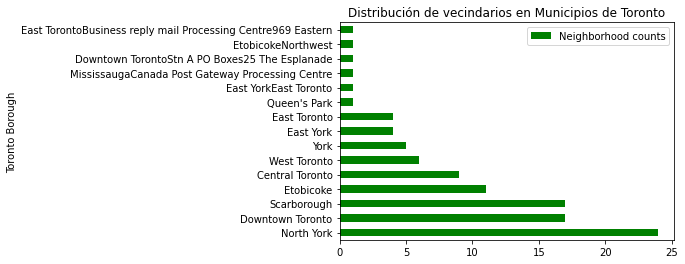

In [ ]:
print('En Toronto:')
Neigh_counts_To.plot.barh(x='Toronto Borough', y='Neighborhood counts', 
             title='Distribución de vecindarios en Municipios de Toronto', color='green')

En Nueva York:


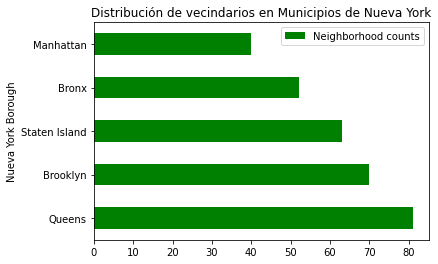

In [ ]:
print('En Nueva York:')
Neigh_counts_NY.plot.barh(x='Nueva York Borough', y='Neighborhood counts', 
             title='Distribución de vecindarios en Municipios de Nueva York', color='green')

#####Diagramas de cajas con distribuciones de vecindarios en los municipios de las dos ciudades

En Toronto:


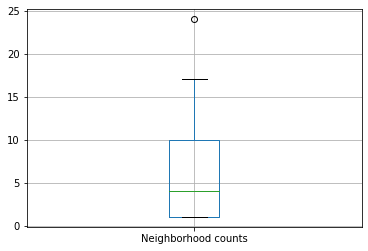

In [ ]:
print('En Toronto:')
boxplot_Neigh_counts_To = Neigh_counts_To.boxplot(column=['Neighborhood counts'])

En Nueva York:


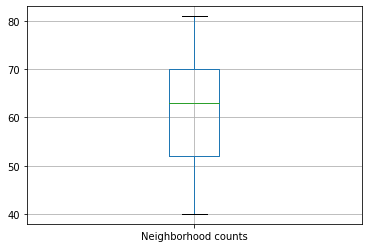

In [ ]:
print('En Nueva York:')
boxplot_Neigh_counts_NY = Neigh_counts_NY.boxplot(column=['Neighborhood counts'])

###Segunda etapa de recolección<a name="segunda"></a>

* [Extracción de datos con la API Foursquare](#Foursquare)
* [Primer ejemplo de aplicación: Una descripción general de las categorías de sitios más comunes en los vecindarios](#Ejemplo1)

####Extracción de datos con la API Foursquare<a name="Foursquare"></a>

In [ ]:
#Importamos librería request
import requests

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name, lat, lng)
            
        # crear la URL de solicitud de API
        url = "https://api.foursquare.com/v3/places/search?ll={}%2C{}&radius={}&limit=50".format(lat, lng, radius)

        headers = {
            "Accept": "application/json",
            "Authorization": "fsq32FQVR4rb8gN38EX8nw9vXYrjR0D874DdIeTTJtHhEWU="
                }

        response = requests.get(url, headers=headers)
        results = json.loads(response.text)["results"]
        # regresa solo información relevante de cada sitio cercano
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['geocodes']['main']['latitude'], 
            v['geocodes']['main']['longitude'],  
            v['categories'][0]['name']) for v in results if len(v['categories'])>0 and len(v['geocodes'])>0])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
To_NY_venues = getNearbyVenues(data["Neighborhood"], data["Latitude"], data["Longitude"])

Parkwoods 43.7532586 -79.3296565
Victoria Village 43.7258823 -79.3155716
Regent Park , Harbourfront 43.6542599 -79.3606359
Lawrence Manor , Lawrence Heights 43.718518 -79.4647633
Ontario Provincial Government 43.6623015 -79.3894938
Islington Avenue 43.6678556 -79.5322424
Malvern , Rouge 43.8066863 -79.1943534
Don MillsNorth 43.7459058 -79.352188
Parkview Hill , Woodbine Gardens 43.7063972 -79.309937
Garden District, Ryerson 43.6571618 -79.3789371
Glencairn 43.709577 -79.4450726
West Deane Park , Princess Gardens , Martin Grove , Islington , Cloverdale 43.6509432 -79.5547244
Rouge Hill , Port Union , Highland Creek 43.7845351 -79.1604971
Don MillsSouth 43.7258997 -79.340923
Woodbine Heights 43.6953439 -79.3183887
St. James Town 43.6514939 -79.3754179
Humewood-Cedarvale 43.6937813 -79.4281914
Eringate , Bloordale Gardens , Old Burnhamthorpe , Markland Wood 43.6435152 -79.5772008
Guildwood , Morningside , West Hill 43.7635726 -79.1887115
The Beaches 43.6763574 -79.2930312
Berczy Park 43.6

Hemos obtenido los distintos sitios en los vecindarios de Toronto y de Nueva York y tenemos los datos de ubicación. 

Visualizamos las primeras filas de la tabla:

In [ ]:
To_NY_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.754751,-79.328439,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751978,-79.333389,Food and Beverage Retail
2,Parkwoods,43.753259,-79.329656,Money in Motion,43.752947,-79.332418,Financial Service
3,Parkwoods,43.753259,-79.329656,Toronto Custom Lights,43.752947,-79.332418,Business and Professional Services
4,Parkwoods,43.753259,-79.329656,Pneutrans Systems Ltd,43.754856,-79.327753,Business and Professional Services


In [ ]:
To_NY_venues.shape

(17788, 7)

####Primer ejemplo de aplicación: Una descripción general de las categorías de sitios más comunes en los vecindarios <a name="Ejemplo1"></a>

In [ ]:
#Revisamos cuantos sitios se regresarón para cada barrio
Sitios_count = To_NY_venues.groupby('Neighborhood').count()
Sitios_count = Sitios_count.sort_values('Venue',ascending=False)
Sitios_count.reset_index(inplace=True)

In [ ]:
#Analizamos cada barrio
# codificación
To_NY_onehot = pd.get_dummies(To_NY_venues[['Venue Category']], prefix="", prefix_sep="")

# añadir la columna de barrio de regreso al dataframe
To_NY_onehot['Neighborhood'] = To_NY_venues['Neighborhood'] 

# mover la columna de barrio a la primer columna
fixed_columns = [To_NY_onehot.columns[-1]] + list(To_NY_onehot.columns[:-1])
To_NY_onehot = To_NY_onehot[fixed_columns]

In [ ]:
#Agrupamos las filas por barrios tomando la média de la frecuancia de la ocurrencia de cada categoría
To_NY_grouped = To_NY_onehot.groupby('Neighborhood').mean().reset_index()

In [ ]:
#Función para ordenar los sitios en orden descendente
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
#Importamos librería numpy
import numpy as np

In [ ]:
#Generemos el nuevo dataframe y mostremos los primeros 10 sitios de cada barrio
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# crear las columnas acorde al numero de sitios populares
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# crear un nuevo dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = To_NY_grouped['Neighborhood']

for ind in np.arange(To_NY_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(To_NY_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Clothing Store,General Contractor,Painter,Restaurant,Home Improvement Service,Real Estate Agency,Sporting Goods Retail,Business and Professional Services,Construction,Hair Salon
1,"Alderwood , Long Branch",Business and Professional Services,Plumber,Used Car Dealership,Clothing Store,Home Improvement Service,Bank,Automotive Repair Shop,Burger Joint,Fruit and Vegetable Store,Dance Studio
2,Allerton,General Contractor,Real Estate Agency,Pizzeria,Drugstore,Spa,Automotive Repair Shop,Grocery Store / Supermarket,Chinese Restaurant,American Restaurant,Health and Beauty Service
3,Annadale,Attorney / Law Office,Pizzeria,Hair Salon,Accounting and Bookkeeping Service,Audiovisual Service,Diner,Cocktail Bar,Bagel Shop,General Contractor,Deli
4,Arden Heights,General Contractor,Business and Professional Services,Mover,"Heating, Ventilating and Air Conditioning Cont...",Audiovisual Service,Real Estate Agency,Real Estate Service,Playground,Carpet and Flooring Contractor,Nutritionist


#####Primero empezamos por observar las 10 categorías de sitios que aparecen con más frecuencias para ambas ciudades.

In [ ]:
To_NY_venues_Category = To_NY_venues['Venue Category'].value_counts().rename_axis('Venue Category').reset_index(name='Venue Category counts')
To_NY_venues_Category.head(10)


,Venue Category,Venue Category counts
0,Hair Salon,573
1,Pizzeria,453
2,Grocery Store / Supermarket,420
3,General Contractor,379
4,Restaurant,374
5,Deli,342
6,Business and Professional Services,325
7,Nail Salon,324
8,Bakery,321
9,Automotive Repair Shop,282


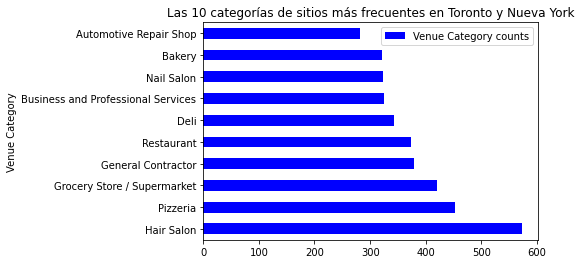

In [ ]:
To_NY_venues_Category.head(10).plot.barh(x='Venue Category', y='Venue Category counts', 
             title='Las 10 categorías de sitios más frecuentes en Toronto y Nueva York', color='blue')

#####Ahora observamos cuales fueron las 10 categorías catalogadas como "Primer lugar más común" que aparecen con más frecuencia

In [ ]:
neighborhoods_venues_sorted_counts = neighborhoods_venues_sorted['1st Most Common Venue'].value_counts().rename_axis('1st Most Common Venues').reset_index(name='1st Most Common Venues counts')
neighborhoods_venues_sorted_counts.head(10)

,1st Most Common Venues,1st Most Common Venues counts
0,General Contractor,38
1,Hair Salon,34
2,Restaurant,23
3,Grocery Store / Supermarket,22
4,Pizzeria,21
5,Business and Professional Services,20
6,Automotive Repair Shop,16
7,Nail Salon,15
8,Clothing Store,14
9,Attorney / Law Office,10


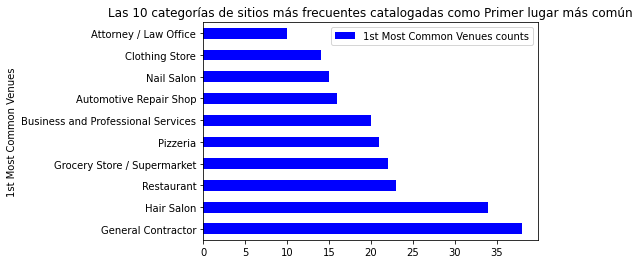

In [ ]:
neighborhoods_venues_sorted_counts.head(10).plot.barh(x='1st Most Common Venues', y='1st Most Common Venues counts', 
             title='Las 10 categorías de sitios más frecuentes catalogadas como Primer lugar más común', color='blue')

##Metodología<a name="Metodología"></a>

* [Método de agrupamiento k-medias](#k-medias)
* [Visualización de agrupamiento en el mapa](#mapa)


Ahora que ya contamos con los datos de los distintos vecindarios y las categorías de sitios más comunes dentro de cada uno de ellos, nos enfocamos en aplicar el modelo de aprendizaje automático no supervisado: **Método de agrupamiento k-medias**. A través de esta técnica buscamos agrupar los distintos vecindarios sin tomar en cuenta si pertenecen a una u otra ciudad, sino que nos interesan similitudes y diferencias de estos para poder agruparlos, y para ello partimos de la información sobre categorías de sitios más comunes. Se aplicarán así mismo **métodos de visualización de datos** para poder observar en el mapa de ambas ciudades como quedaron conformados los grupos asignando distintos colores a las marcas de ubicación según donde han sido asignados. 

###Método de agrupamiento k-medias<a name="k-medias"></a>

####Elegir número de cluster para agrupar vecindarios (parámetro k)

Experimentando con distintos valores de k, se ha recolectado datos sobre cuántos vecindarios conforman los distintos cluster para cada k elegido. Luego visualizamos gráficamente esto mismo para tomar una decisión. Presentamos una tabla con estos datos:

In [ ]:
Cluster_Mayores = pd.DataFrame()
Cluster_Mayores['Elección de k'] = [2,3,4,5,6,7]
Cluster_Mayores['Primer_Cluster'] = [270,251,220,140,153,122]
Cluster_Mayores['Segundo_Cluster'] = [139,157,108,124,110,115]
Cluster_Mayores['Tercer_Cluster'] = [0,1,80,94,76,88]
Cluster_Mayores['Cuarto_Cluster'] = [0,0,1,50,68,44]
Cluster_Mayores['Quinto_Cluster'] = [0,0,0,1,1,28]
Cluster_Mayores['Sexto_Cluster'] = [0,0,0,0,1,11]
Cluster_Mayores['Septimo_Cluster'] = [0,0,0,0,0,1]
Cluster_Mayores

,Elección de k,Primer_Cluster,Segundo_Cluster,Tercer_Cluster,Cuarto_Cluster,Quinto_Cluster,Sexto_Cluster,Septimo_Cluster
0,2,270,139,0,0,0,0,0
1,3,251,157,1,0,0,0,0
2,4,220,108,80,1,0,0,0
3,5,140,124,94,50,1,0,0
4,6,153,110,76,68,1,1,0
5,7,122,115,88,44,28,11,1


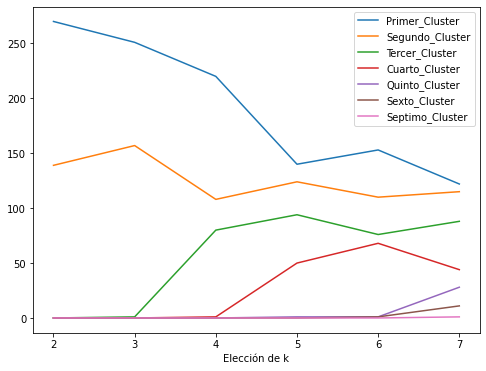

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 6))
ax = plt.gca() 
Cluster_Mayores.plot(x='Elección de k',y='Primer_Cluster',ax = ax)
Cluster_Mayores.plot(x='Elección de k',y='Segundo_Cluster',ax = ax)
Cluster_Mayores.plot(x='Elección de k',y='Tercer_Cluster',ax = ax)
Cluster_Mayores.plot(x='Elección de k',y='Cuarto_Cluster',ax = ax)
Cluster_Mayores.plot(x='Elección de k',y='Quinto_Cluster',ax = ax)
Cluster_Mayores.plot(x='Elección de k',y='Sexto_Cluster',ax = ax)
Cluster_Mayores.plot(x='Elección de k',y='Septimo_Cluster',ax = ax)
plt.legend(loc="upper right")

Para **k=5** notamos una fuerte caída del número de vecindarios en el mayor cluster, y podemos ver a su vez cómo se estaría conformando un nuevo cluster bastante significativo en cantidad de vecindarios a su vez que crecen significativamente otros dos. Luego con k mayores a 5 las variaciones comienzan a ser poco significativas, por tanto en nuestro caso este número de cluster a formar será nuestra elección.

In [ ]:
# establecer el número de agrupaciones
kclusters = 5

####Aplicación del método para el parámetro k elegido

In [ ]:
# importamos k-means desde la fase de agrupación
from sklearn.cluster import KMeans

In [ ]:
To_NY_grouped_clustering = To_NY_grouped.drop('Neighborhood', 1)

# ejecutar k-means
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(To_NY_grouped_clustering)

# revisar las etiquetas de las agrupaciones generadas para cada fila del dataframe
kmeans.labels_[0:10] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


array([1, 1, 1, 1, 4, 1, 1, 1, 0, 4], dtype=int32)

In [ ]:
#Generemos un nuevo dataframe que incluya la agrupación asi como los 10 sitios mas populares de cada barrio
# añadir etiquetas
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

To_NY_merged = data

To_NY_merged = To_NY_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [ ]:
#Primeras filas de la tabla To_NY_merged 
To_NY_merged.head()

,City,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Toronto,North York,Parkwoods,43.753259,-79.329656,4,Business and Professional Services,Accounting and Bookkeeping Service,Community and Government,Financial Service,Engineer,Health Food Store,Park,Website Designer,Audiovisual Service,Vintage and Thrift Store
1,Toronto,North York,Victoria Village,43.725882,-79.315572,1,Car Dealership,General Contractor,Print Store,Media Agency,Organization,Automotive Repair Shop,Bookstore,Tailor,Bridal Store,Burger Joint
2,Toronto,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636,0,Automotive Repair Shop,Car Dealership,Park,Restaurant,Furniture and Home Store,Bakery,Music Venue,Coffee Shop,Italian Restaurant,Arts and Entertainment
3,Toronto,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763,0,Clothing Store,Housewares Store,Carpet and Flooring Contractor,Cosmetics Store,Event Service,Loans Agency,Men's Store,Metals Supplier,Hair Salon,Gymnastics Center
4,Toronto,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,0,Café,"Cafes, Coffee, and Tea Houses",Hair Salon,Bank,Fried Chicken Joint,Deli,Coffee Shop,Italian Restaurant,Diner,Organization


In [ ]:
#Ultimas filas de la tabla To_NY_merged
To_NY_merged.tail()

,City,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
404,Nueva York,Manhattan,Hudson Yards,40.756658,-74.000111,0,Restaurant,American Restaurant,Coffee Shop,Cocktail Bar,Café,Grocery Store / Supermarket,Art Gallery,Furniture and Home Store,Music Venue,Pet Supplies Store
405,Nueva York,Queens,Hammels,40.587338,-73.805530,1,Beach,Playground,Used Car Dealership,Community and Government,Dog Park,Automotive Repair Shop,Real Estate Agency,Building and Land Surveyor,Surf Spot,Sports and Recreation
406,Nueva York,Queens,Bayswater,40.611322,-73.765968,4,Playground,Restaurant,General Contractor,Pest Control Service,Travel Agency,Government Department / Agency,"Heating, Ventilating and Air Conditioning Cont...",Jewelry Store,Accounting and Bookkeeping Service,New American Restaurant
407,Nueva York,Queens,Queensbridge,40.756091,-73.945631,1,Deli,Print Store,Public and Social Service,Baseball Field,Playground,General Contractor,Chinese Restaurant,Grocery Store / Supermarket,Park,Barbershop
408,Nueva York,Staten Island,Fox Hills,40.617311,-74.081740,1,Grocery Store / Supermarket,ATM,Business and Professional Services,General Contractor,Organization,Electrician,Business and Strategy Consulting Office,Dining and Drinking,Drugstore,Entertainment Agency


###Visualización de agrupamiento en el mapa<a name="mapa"></a>

In [ ]:
# librería para graficar mapas
import folium  

# convertir una dirección en valores de latitud y longitud
from geopy.geocoders import Nominatim


# Matplotlib y módulos asociados para graficar
import matplotlib.cm as cm
import matplotlib.colors as colors

####Visualización en Toronto

In [ ]:
# Observar vecindarios en Toronto

address = 'Toronto'

geolocator = Nominatim(user_agent="Tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [ ]:
 #Visualicemos las agrupaciones resultantes
 # crear mapa
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# establecer el esquema de color para las agrupaciones
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# añadir marcadores al mapa
markers_colors = []
for lat, lon, poi, cluster in zip(To_NY_merged['Latitude'], To_NY_merged['Longitude'], To_NY_merged['Neighborhood'], To_NY_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

####Visualización en Nueva York

In [ ]:
# Observar vecindarios en New York

address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [ ]:
 #Visualicemos las agrupaciones resultantes
 # crear mapa
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# establecer el esquema de color para las agrupaciones
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# añadir marcadores al mapa
markers_colors = []
for lat, lon, poi, cluster in zip(To_NY_merged['Latitude'], To_NY_merged['Longitude'], To_NY_merged['Neighborhood'], To_NY_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

##Resultados<a name="Resultados"></a>

Observamos gráficamente la conformación de los distintos cluster que han quedado conformados en nuestro modelo.

In [ ]:
#Cluster para ciudad de Toronto
filter_To = To_NY_merged['City']=='Toronto'
To_merged = To_NY_merged [filter_To]
To_merged.head()

,City,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Toronto,North York,Parkwoods,43.753259,-79.329656,4,Business and Professional Services,Accounting and Bookkeeping Service,Community and Government,Financial Service,Engineer,Health Food Store,Park,Website Designer,Audiovisual Service,Vintage and Thrift Store
1,Toronto,North York,Victoria Village,43.725882,-79.315572,1,Car Dealership,General Contractor,Print Store,Media Agency,Organization,Automotive Repair Shop,Bookstore,Tailor,Bridal Store,Burger Joint
2,Toronto,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636,0,Automotive Repair Shop,Car Dealership,Park,Restaurant,Furniture and Home Store,Bakery,Music Venue,Coffee Shop,Italian Restaurant,Arts and Entertainment
3,Toronto,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763,0,Clothing Store,Housewares Store,Carpet and Flooring Contractor,Cosmetics Store,Event Service,Loans Agency,Men's Store,Metals Supplier,Hair Salon,Gymnastics Center
4,Toronto,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,0,Café,"Cafes, Coffee, and Tea Houses",Hair Salon,Bank,Fried Chicken Joint,Deli,Coffee Shop,Italian Restaurant,Diner,Organization


In [ ]:
#Cluster para ciudad de Nueva York
filter_NY = To_NY_merged['City']=='Nueva York'
NY_merged = To_NY_merged [filter_NY]
NY_merged.head()

,City,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
103,Nueva York,Bronx,Wakefield,40.894705,-73.847201,1,General Contractor,Convenience Store,Organization,Accounting and Bookkeeping Service,Hair Salon,Attorney / Law Office,Financial Service,American Restaurant,Deli,Ice Cream Parlor
104,Nueva York,Bronx,Co-op City,40.874294,-73.829939,3,Health and Beauty Service,Accounting and Bookkeeping Service,Other Great Outdoors,Grocery Store / Supermarket,Retail,Drugstore,Basketball Court,"Heating, Ventilating and Air Conditioning Cont...",Health and Medicine,Media Agency
105,Nueva York,Bronx,Eastchester,40.887556,-73.827806,1,Automotive Repair Shop,Deli,Tire Repair Shop,General Contractor,Diner,Bar,Used Car Dealership,Automotive Retail,Burger Joint,Bagel Shop
106,Nueva York,Bronx,Fieldston,40.895437,-73.905643,1,Organization,Attorney / Law Office,Soccer Club,Office,Security and Safety,Media Agency,History Museum,Pest Control Service,Pet Sitting and Boarding Service,Community and Government
107,Nueva York,Bronx,Riverdale,40.890834,-73.912585,4,Business and Professional Services,Community and Government,General Contractor,Car Dealership,Property Management Office,Telecommunication Service,Mover,Park,Baseball Field,Tennis


Observamos a continuación

In [ ]:
#Conformación de los distintos cluster en ambas ciudades
Cluster_Sum_To_NY = To_NY_merged['Cluster Labels'].value_counts().rename_axis('Cluster Labels').reset_index(name='Cluster Labels Counts (Sum)')
#Conformación de los distintos cluster en Toronto
Cluster_To = To_merged['Cluster Labels'].value_counts().rename_axis('Cluster Labels').reset_index(name='Cluster Labels Counts (Toronto)')
#Conformación de los distintos cluster en Nueva York
Cluster_NY = NY_merged['Cluster Labels'].value_counts().rename_axis('Cluster Labels').reset_index(name='Cluster Labels Counts (Nueva York)')
#Unimos los datos de conformación de los distintos cluster para ambas ciudades
Cluster_To_NY = pd.merge(left=Cluster_To,right=Cluster_NY, how='left', left_on='Cluster Labels', right_on='Cluster Labels').fillna(0)
Cluster_To_NY['Cluster Labels Counts (Nueva York)'] = Cluster_To_NY['Cluster Labels Counts (Nueva York)'].astype('int64')
Cluster_To_NY = Cluster_To_NY.sort_values('Cluster Labels').reset_index().drop(['index'], axis=1)
Cluster_To_NY = pd.merge(Cluster_To_NY, Cluster_Sum_To_NY, on ='Cluster Labels')
Cluster_To_NY

,Cluster Labels,Cluster Labels Counts (Toronto),Cluster Labels Counts (Nueva York),Cluster Labels Counts (Sum)
0,0,29,65,94
1,1,47,93,140
2,2,1,0,1
3,3,4,120,124
4,4,22,28,50


###Gáfico de barras para observar conformación total de los distintos cluster 

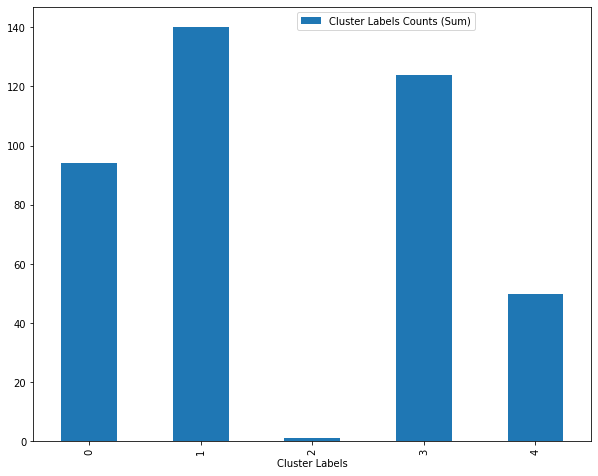

In [ ]:
Cluster_Labels = Cluster_To_NY['Cluster Labels']
Cluster_Labels_Counts = Cluster_To_NY['Cluster Labels Counts (Sum)']

df = pd.DataFrame(Cluster_Labels_Counts,index=Cluster_Labels)

df.plot(kind="bar",stacked=True,figsize=(10,8))
plt.legend(loc="upper right",bbox_to_anchor=(0.8,1.0))
plt.show()

###Gáfico de barras para observar conformación discriminada por ciudades de los distintos cluster

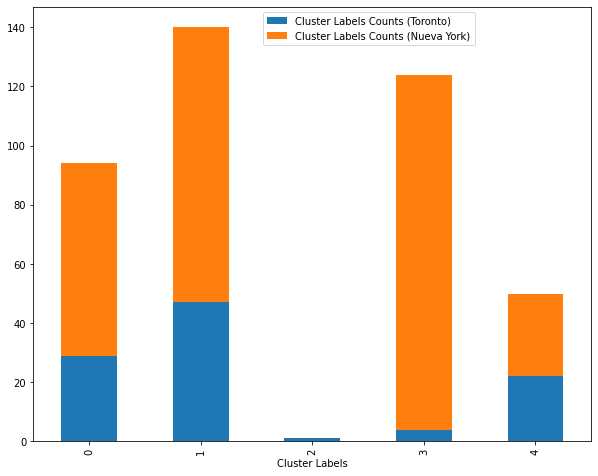

In [ ]:
Cluster_Labels = Cluster_To_NY['Cluster Labels']
Cluster_Labels_Counts = Cluster_To_NY[['Cluster Labels Counts (Toronto)','Cluster Labels Counts (Nueva York)']]

df = pd.DataFrame(Cluster_Labels_Counts,index=Cluster_Labels)

df.plot(kind="bar",stacked=True,figsize=(10,8))
plt.legend(loc="upper right",bbox_to_anchor=(0.8,1.0))
plt.show()

##Análisis<a name="Análisis"></a>

Realizamos un análisis descriptivo acerca de las características de los distintos cluster de vecindarios conformados. En este análisis nos enfocaremos en las categorías que aparecen con más frecuencias en cada cluster tomando en cuenta los dos lugares más comunes por vecindario. Así podremos observar si hay o no características que sobresalgan en cada uno de los cluster.

### Agrupación 1

In [ ]:
To_NY_merged_0 = To_NY_merged.loc[To_NY_merged['Cluster Labels'] == 0, To_NY_merged.columns[[0] + [2] + list(range(6, To_NY_merged.shape[1]))]]
To_NY_merged_0.head()

,City,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Toronto,"Regent Park , Harbourfront",Automotive Repair Shop,Car Dealership,Park,Restaurant,Furniture and Home Store,Bakery,Music Venue,Coffee Shop,Italian Restaurant,Arts and Entertainment
3,Toronto,"Lawrence Manor , Lawrence Heights",Clothing Store,Housewares Store,Carpet and Flooring Contractor,Cosmetics Store,Event Service,Loans Agency,Men's Store,Metals Supplier,Hair Salon,Gymnastics Center
4,Toronto,Ontario Provincial Government,Café,"Cafes, Coffee, and Tea Houses",Hair Salon,Bank,Fried Chicken Joint,Deli,Coffee Shop,Italian Restaurant,Diner,Organization
9,Toronto,"Garden District, Ryerson",Fast Food Restaurant,Department Store,Clothing Store,Beer Bar,Bookstore,Café,Burger Joint,Japanese Restaurant,Movie Theater,Coffee Shop
15,Toronto,St. James Town,Café,Pizzeria,Diner,Asian Restaurant,Coffee Shop,Manufacturer,Middle Eastern Restaurant,BBQ Joint,Lounge,Movie Theater


In [ ]:
#Observamos que categorías frecuentan más entre los primeros dos lugares más comunes de los vecindarios
first_0 =To_NY_merged_0['1st Most Common Venue'].value_counts()[0:5].rename_axis('Category').reset_index(name='1st Most Common Venue (Count)')
second_0 = To_NY_merged_0['2nd Most Common Venue'].value_counts()[0:5].rename_axis('Category').reset_index(name='2nd Most Common Venue (Count)')
first_second_1_0 = pd.merge(left=first_0,right=second_0, how='left', left_on='Category', right_on='Category').fillna(0)
first_second_2_0 = pd.merge(left=second_0,right=first_0, how='left', left_on='Category', right_on='Category').fillna(0)
first_second_0 = first_second_1_0.append(first_second_2_0, ignore_index=True).drop_duplicates()
first_second_0[['1st Most Common Venue (Count)','2nd Most Common Venue (Count)']] = first_second_0[['1st Most Common Venue (Count)','2nd Most Common Venue (Count)']].astype('int64')
first_second_0 = first_second_0.reset_index().drop(['index'], axis=1)
first_second_0

,Category,1st Most Common Venue (Count),2nd Most Common Venue (Count)
0,Restaurant,23,9
1,Café,8,6
2,Cocktail Bar,8,0
3,Clothing Store,8,4
4,Coffee Shop,4,0
5,Hair Salon,0,7
6,Bakery,0,7


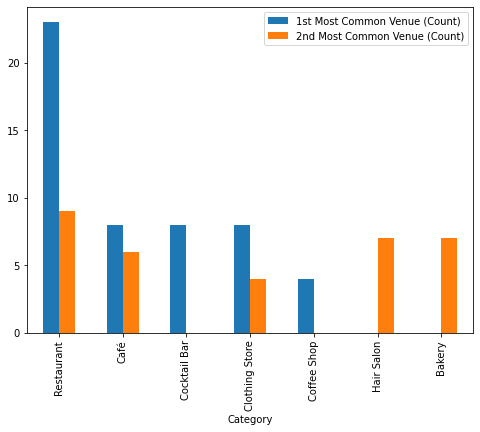

In [ ]:
first_second_0.plot(x="Category", y=["1st Most Common Venue (Count)","2nd Most Common Venue (Count)"], kind="bar",figsize=(8,6))
plt.show()

### Agrupación 2

In [ ]:
To_NY_merged_1 = To_NY_merged.loc[To_NY_merged['Cluster Labels'] == 1, To_NY_merged.columns[[0] + [2] + list(range(6, To_NY_merged.shape[1]))]]
To_NY_merged_1.head()

,City,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Toronto,Victoria Village,Car Dealership,General Contractor,Print Store,Media Agency,Organization,Automotive Repair Shop,Bookstore,Tailor,Bridal Store,Burger Joint
8,Toronto,"Parkview Hill , Woodbine Gardens",Public and Social Service,Hair Salon,Drugstore,Restaurant,Accounting and Bookkeeping Service,Flower Store,Pizzeria,Carpet and Flooring Contractor,Banking and Finance,Home Improvement Service
11,Toronto,"West Deane Park , Princess Gardens , Martin Gr...",Media Agency,Real Estate Service,Filipino Restaurant,Telecommunication Service,Chinese Restaurant,Tea Room,Hair Salon,Middle Eastern Restaurant,Construction,Engineer
13,Toronto,Don MillsSouth,Real Estate Agency,Organization,Automotive Repair Shop,Storage Facility,Pizzeria,Asian Restaurant,Business and Professional Services,Clothing Store,Construction,BBQ Joint
14,Toronto,Woodbine Heights,Professional Cleaning Service,General Contractor,Retail,Skating Rink,Technology Business,Diner,Dry Cleaner,Telecommunication Service,Restaurant,Bakery


In [ ]:
#Observamos que categorías frecuentan más entre los primeros dos lugares más comunes de los vecindarios
first_1 =To_NY_merged_1['1st Most Common Venue'].value_counts()[0:5].rename_axis('Category').reset_index(name='1st Most Common Venue (Count)')
second_1 = To_NY_merged_1['2nd Most Common Venue'].value_counts()[0:5].rename_axis('Category').reset_index(name='2nd Most Common Venue (Count)')
first_second_1_1 = pd.merge(left=first_1,right=second_1, how='left', left_on='Category', right_on='Category').fillna(0)
first_second_2_1 = pd.merge(left=second_1,right=first_1, how='left', left_on='Category', right_on='Category').fillna(0)
first_second_1 = first_second_1_1.append(first_second_2_1, ignore_index=True).drop_duplicates()
first_second_1[['1st Most Common Venue (Count)','2nd Most Common Venue (Count)']] = first_second_1[['1st Most Common Venue (Count)','2nd Most Common Venue (Count)']].astype('int64')
first_second_1 = first_second_1.reset_index().drop(['index'], axis=1)
first_second_1

,Category,1st Most Common Venue (Count),2nd Most Common Venue (Count)
0,General Contractor,19,12
1,Automotive Repair Shop,13,6
2,Attorney / Law Office,10,0
3,Playground,7,0
4,ATM,6,0
5,Grocery Store / Supermarket,0,6
6,Health and Beauty Service,0,5
7,Real Estate Agency,0,5


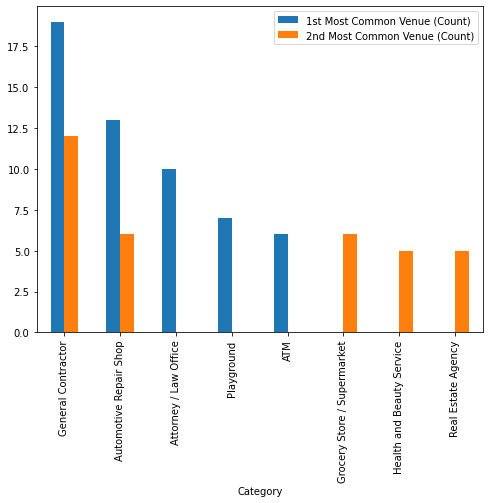

In [ ]:
first_second_1.plot(x="Category", y=["1st Most Common Venue (Count)","2nd Most Common Venue (Count)"], kind="bar",figsize=(8,6))
plt.show()

### Agrupación 3

In [ ]:
To_NY_merged_2 = To_NY_merged.loc[To_NY_merged['Cluster Labels'] == 2, To_NY_merged.columns[[0] + [2] + list(range(6, To_NY_merged.shape[1]))]]
To_NY_merged_2.head()

,City,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
95,Toronto,Upper Rouge,Organization,ATM,Performing Arts Venue,Ophthalmologist,Optometrist,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Packaging Supply Store,Paintball Field


### Agrupación 4

In [ ]:
To_NY_merged_3 = To_NY_merged.loc[To_NY_merged['Cluster Labels'] == 3, To_NY_merged.columns[[0] + [2] + list(range(6, To_NY_merged.shape[1]))]]
To_NY_merged_3.head()

,City,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Toronto,Glencairn,Hair Salon,General Contractor,Bakery,Convenience Store,Restaurant,Pizzeria,"Heating, Ventilating and Air Conditioning Cont...",Nail Salon,Gourmet Store,Pet Service
29,Toronto,Thorncliffe Park,Drugstore,Public and Social Service,Hair Salon,Pizzeria,Fast Food Restaurant,Grocery Store / Supermarket,ATM,"Cafes, Coffee, and Tea Houses",Business and Professional Services,Butcher
79,Toronto,Davisville,Nail Salon,Hair Salon,Pizzeria,Hobby Store,Candy Store,Flower Store,Jewelry Store,American Restaurant,Café,Toy / Game Store
81,Toronto,"Runnymede , Swansea",Hair Salon,Nail Salon,Café,Italian Restaurant,Pizzeria,Bookstore,Spa,Noodle Restaurant,Scenic Lookout,Grocery Store / Supermarket
104,Nueva York,Co-op City,Health and Beauty Service,Accounting and Bookkeeping Service,Other Great Outdoors,Grocery Store / Supermarket,Retail,Drugstore,Basketball Court,"Heating, Ventilating and Air Conditioning Cont...",Health and Medicine,Media Agency


In [ ]:
#Observamos que categorías frecuentan más entre los primeros dos lugares más comunes de los vecindarios
first_3 =To_NY_merged_3['1st Most Common Venue'].value_counts()[0:5].rename_axis('Category').reset_index(name='1st Most Common Venue (Count)')
second_3 = To_NY_merged_3['2nd Most Common Venue'].value_counts()[0:5].rename_axis('Category').reset_index(name='2nd Most Common Venue (Count)')
first_second_1_3 = pd.merge(left=first_3,right=second_3, how='left', left_on='Category', right_on='Category').fillna(0)
first_second_2_3 = pd.merge(left=second_3,right=first_3, how='left', left_on='Category', right_on='Category').fillna(0)
first_second_3 = first_second_1_3.append(first_second_2_3, ignore_index=True).drop_duplicates()
first_second_3[['1st Most Common Venue (Count)','2nd Most Common Venue (Count)']] = first_second_3[['1st Most Common Venue (Count)','2nd Most Common Venue (Count)']].astype('int64')
first_second_3 = first_second_3.reset_index().drop(['index'], axis=1)
first_second_3

,Category,1st Most Common Venue (Count),2nd Most Common Venue (Count)
0,Hair Salon,27,16
1,Grocery Store / Supermarket,20,12
2,Pizzeria,17,8
3,Nail Salon,12,13
4,Deli,5,0
5,Chinese Restaurant,0,9


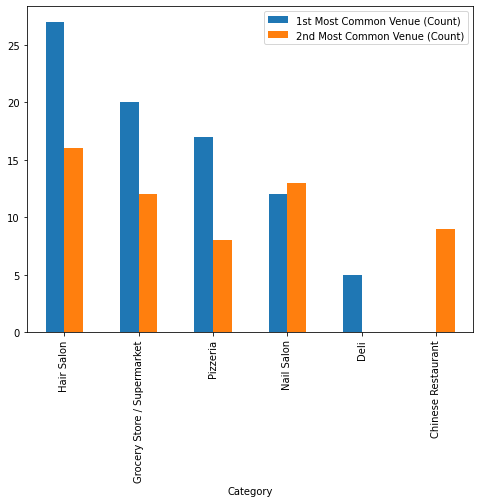

In [ ]:
first_second_3.plot(x="Category", y=["1st Most Common Venue (Count)","2nd Most Common Venue (Count)"], kind="bar",figsize=(8,6))
plt.show()

### Agrupación 5

In [ ]:
To_NY_merged_4 = To_NY_merged.loc[To_NY_merged['Cluster Labels'] == 4, To_NY_merged.columns[[0] + [2] + list(range(6, To_NY_merged.shape[1]))]]
To_NY_merged_4.head()

,City,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Toronto,Parkwoods,Business and Professional Services,Accounting and Bookkeeping Service,Community and Government,Financial Service,Engineer,Health Food Store,Park,Website Designer,Audiovisual Service,Vintage and Thrift Store
5,Toronto,Islington Avenue,General Contractor,Business and Strategy Consulting Office,Landscaper and Gardener,Business and Professional Services,Furniture and Home Store,Event Service,Real Estate Development and Title Company,Mobile Phone Store,Website Designer,Optometrist
6,Toronto,"Malvern , Rouge",General Contractor,Business and Professional Services,Doors and Windows Contractor,Automotive Repair Shop,Import and Export Service,Print Store,Audiovisual Service,Arts and Crafts Store,Sports and Recreation,Bakery
7,Toronto,Don MillsNorth,General Contractor,Travel Agency,Computer Repair Service,Security and Safety,Loans Agency,Business and Professional Services,Baseball Field,Diner,Clothing Store,Automotive Repair Shop
12,Toronto,"Rouge Hill , Port Union , Highland Creek",General Contractor,Business and Professional Services,Automotive Repair Shop,Engineer,Carpet and Flooring Contractor,Clothing Store,Electronics Store,Government Department / Agency,Hair Salon,Photographer


In [ ]:
#Observamos que categorías frecuentan más entre los primeros dos lugares más comunes de los vecindarios
first_4 =To_NY_merged_4['1st Most Common Venue'].value_counts()[0:5].rename_axis('Category').reset_index(name='1st Most Common Venue (Count)')
second_4 = To_NY_merged_4['2nd Most Common Venue'].value_counts()[0:5].rename_axis('Category').reset_index(name='2nd Most Common Venue (Count)')
first_second_1_4 = pd.merge(left=first_4,right=second_4, how='left', left_on='Category', right_on='Category').fillna(0)
first_second_2_4 = pd.merge(left=second_4,right=first_4, how='left', left_on='Category', right_on='Category').fillna(0)
first_second_4 = first_second_1_4.append(first_second_2_4, ignore_index=True).drop_duplicates()
first_second_4[['1st Most Common Venue (Count)','2nd Most Common Venue (Count)']] = first_second_4[['1st Most Common Venue (Count)','2nd Most Common Venue (Count)']].astype('int64')
first_second_4 = first_second_4.reset_index().drop(['index'], axis=1)
first_second_4

,Category,1st Most Common Venue (Count),2nd Most Common Venue (Count)
0,General Contractor,21,9
1,Business and Professional Services,14,9
2,Park,2,0
3,Computer Repair Service,1,0
4,Insurance Agency,1,0
5,Landscaper and Gardener,0,2
6,Travel Agency,0,2
7,Real Estate Agency,0,2


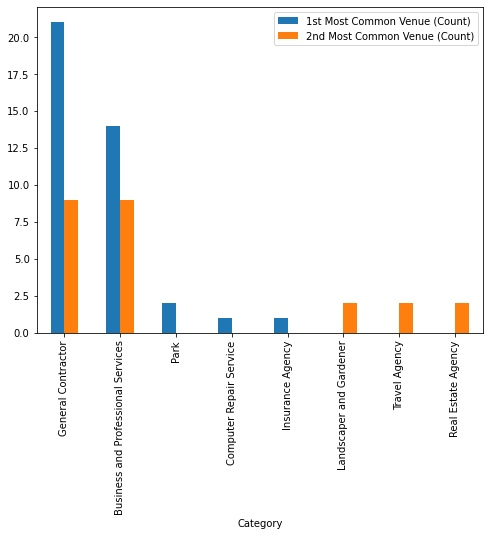

In [ ]:
first_second_4.plot(x="Category", y=["1st Most Common Venue (Count)","2nd Most Common Venue (Count)"], kind="bar",figsize=(8,6))
plt.show()

## Conclusiones<a name="Conclusiones"></a>

Hemos analizado dos grandes ciudades capitales, las cuales han de ser ciudades multiculturales con muchas características que definen a los distintos vecindarios que las conforman, que los hacen más o menos similares o diferentes unos con los otros. Hemos podido investigar a grades razgos qué vecindarios de una y otra ciudad tienen unas u otras características que nos permiten mediante aplicación de aprendizaje automático agruparlos de determinada forma. Como se ha observado en nuestro análisis descriptivo hay características que sobresalen del resto bastante más en unos grupos que en otros. Sin duda que este informe es apensas una puntita de toda la información que podemos recabar y que a partir de estos datos se puede seguir profundizando mucho más en el análisis.